In [5]:
!git clone https://github.com/stvschmdt/ne_ds5230.git

Cloning into 'ne_ds5230'...
remote: Enumerating objects: 157, done.
remote: Counting objects: 100% (59/59), done.
remote: Compressing objects: 100% (56/56), done.
remote: Total 157 (delta 31), reused 8 (delta 3), pack-reused 98
Receiving objects: 100% (157/157), 18.21 MiB | 19.32 MiB/s, done.
Resolving deltas: 100% (74/74), done.


In [6]:
%cd ne_ds5230/prep_material/

/content/ne_ds5230/prep_material/ne_ds5230/prep_material


In [7]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA, TruncatedSVD
import numpy as np
from sklearn import metrics
from collections import defaultdict
import seaborn as sns
import matplotlib.pyplot as plt


In [8]:
#read in data
raw_df = pd.read_csv('genres_v2.csv')
print(len(raw_df))

42305


<ipython-input-8-0138e313eb76>:2: DtypeWarning: Columns (19) have mixed types. Specify dtype option on import or set low_memory=False.
  raw_df = pd.read_csv('genres_v2.csv')


In [9]:
raw_df.head(10)


,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,...,id,uri,track_href,analysis_url,duration_ms,time_signature,genre,song_name,Unnamed: 0,title
0,0.831,0.814,2,-7.364,1,0.4200,0.0598,0.013400,0.0556,0.3890,...,2Vc6NJ9PW9gD9q343XFRKx,spotify:track:2Vc6NJ9PW9gD9q343XFRKx,https://api.spotify.com/v1/tracks/2Vc6NJ9PW9gD...,https://api.spotify.com/v1/audio-analysis/2Vc6...,124539,4,Dark Trap,Mercury: Retrograde,NaN,NaN
1,0.719,0.493,8,-7.230,1,0.0794,0.4010,0.000000,0.1180,0.1240,...,7pgJBLVz5VmnL7uGHmRj6p,spotify:track:7pgJBLVz5VmnL7uGHmRj6p,https://api.spotify.com/v1/tracks/7pgJBLVz5Vmn...,https://api.spotify.com/v1/audio-analysis/7pgJ...,224427,4,Dark Trap,Pathology,NaN,NaN
2,0.850,0.893,5,-4.783,1,0.0623,0.0138,0.000004,0.3720,0.0391,...,0vSWgAlfpye0WCGeNmuNhy,spotify:track:0vSWgAlfpye0WCGeNmuNhy,https://api.spotify.com/v1/tracks/0vSWgAlfpye0...,https://api.spotify.com/v1/audio-analysis/0vSW...,98821,4,Dark Trap,Symbiote,NaN,NaN
3,0.476,0.781,0,-4.710,1,0.1030,0.0237,0.000000,0.1140,0.1750,...,0VSXnJqQkwuH2ei1nOQ1nu,spotify:track:0VSXnJqQkwuH2ei1nOQ1nu,https://api.spotify.com/v1/tracks/0VSXnJqQkwuH...,https://api.spotify.com/v1/audio-analysis/0VSX...,123661,3,Dark Trap,ProductOfDrugs (Prod. The Virus and Antidote),NaN,NaN
4,0.798,0.624,2,-7.668,1,0.2930,0.2170,0.000000,0.1660,0.5910,...,4jCeguq9rMTlbMmPHuO7S3,spotify:track:4jCeguq9rMTlbMmPHuO7S3,https://api.spotify.com/v1/tracks/4jCeguq9rMTl...,https://api.spotify.com/v1/audio-analysis/4jCe...,123298,4,Dark Trap,Venom,NaN,NaN
5,0.721,0.568,0,-11.295,1,0.4140,0.0452,0.212000,0.1280,0.1090,...,6fsypiJHyWmeINsOLC1cos,spotify:track:6fsypiJHyWmeINsOLC1cos,https://api.spotify.com/v1/tracks/6fsypiJHyWme...,https://api.spotify.com/v1/audio-analysis/6fsy...,112511,4,Dark Trap,Gatteka,NaN,NaN
6,0.718,0.668,8,-4.162,1,0.1370,0.0254,0.007800,0.1240,0.0380,...,0XfQbq7DaMOmVXgQ71eA6E,spotify:track:0XfQbq7DaMOmVXgQ71eA6E,https://api.spotify.com/v1/tracks/0XfQbq7DaMOm...,https://api.spotify.com/v1/audio-analysis/0XfQ...,77584,4,Dark Trap,kamikaze (+ pulse),NaN,NaN
7,0.694,0.711,8,-5.525,1,0.2210,0.0397,0.000000,0.1120,0.2830,...,0LLeuNBWPOg3XA73yab3PT,spotify:track:0LLeuNBWPOg3XA73yab3PT,https://api.spotify.com/v1/tracks/0LLeuNBWPOg3...,https://api.spotify.com/v1/audio-analysis/0LLe...,127524,3,Dark Trap,T.R.U. (Totally Rotten Underground),NaN,NaN
8,0.774,0.751,1,-2.445,1,0.1980,0.0614,0.000000,0.0728,0.1890,...,37gqBnUAZe8BY8WR56kDNk,spotify:track:37gqBnUAZe8BY8WR56kDNk,https://api.spotify.com/v1/tracks/37gqBnUAZe8B...,https://api.spotify.com/v1/audio-analysis/37gq...,140326,4,Dark Trap,I Put My Dick in Your Mental,NaN,NaN
9,0.893,0.907,11,-10.406,1,0.3670,0.1520,0.031100,0.5580,0.3020,...,2ggqfj97qyiORmXoVFzP5j,spotify:track:2ggqfj97qyiORmXoVFzP5j,https://api.spotify.com/v1/tracks/2ggqfj97qyiO...,https://api.spotify.com/v1/audio-analysis/2ggq...,121979,4,Dark Trap,Andromeda,NaN,NaN


In [10]:
labels = raw_df['genre']
unique_labels, category_sizes = np.unique(labels, return_counts=True)
print(len(unique_labels))

raw_df = raw_df.drop(columns=['id', 'type', 'uri', 'track_href', 'analysis_url', 'time_signature', 'genre', 'song_name', 'Unnamed: 0', 'title'])
raw_df.head(10)

15


,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,0.831,0.814,2,-7.364,1,0.4200,0.0598,0.013400,0.0556,0.3890,156.985,124539
1,0.719,0.493,8,-7.230,1,0.0794,0.4010,0.000000,0.1180,0.1240,115.080,224427
2,0.850,0.893,5,-4.783,1,0.0623,0.0138,0.000004,0.3720,0.0391,218.050,98821
3,0.476,0.781,0,-4.710,1,0.1030,0.0237,0.000000,0.1140,0.1750,186.948,123661
4,0.798,0.624,2,-7.668,1,0.2930,0.2170,0.000000,0.1660,0.5910,147.988,123298
5,0.721,0.568,0,-11.295,1,0.4140,0.0452,0.212000,0.1280,0.1090,144.915,112511
6,0.718,0.668,8,-4.162,1,0.1370,0.0254,0.007800,0.1240,0.0380,130.826,77584
7,0.694,0.711,8,-5.525,1,0.2210,0.0397,0.000000,0.1120,0.2830,138.049,127524
8,0.774,0.751,1,-2.445,1,0.1980,0.0614,0.000000,0.0728,0.1890,219.960,140326
9,0.893,0.907,11,-10.406,1,0.3670,0.1520,0.031100,0.5580,0.3020,199.942,121979


In [11]:
print(unique_labels)

['Dark Trap' 'Emo' 'Hiphop' 'Pop' 'Rap' 'RnB' 'Trap Metal'
 'Underground Rap' 'dnb' 'hardstyle' 'psytrance' 'techhouse' 'techno'
 'trance' 'trap']


<Axes: xlabel='danceability', ylabel='energy'>

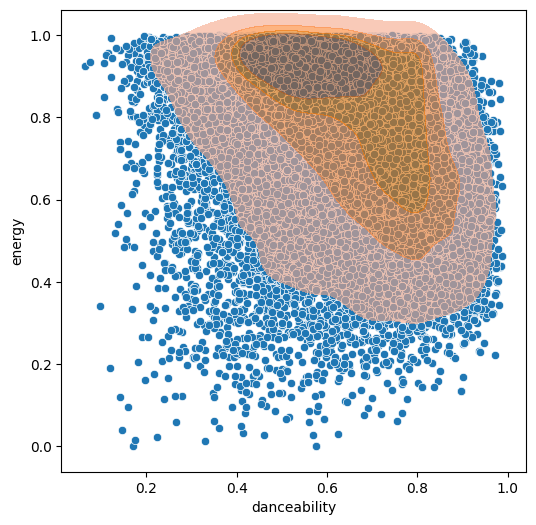

In [12]:
fig, ax = plt.subplots(figsize=(6, 6))
sns.scatterplot(raw_df, x="danceability", y="energy")
sns.kdeplot(
    data=raw_df,
    x="danceability",
    y="energy",
    levels=5,
    fill=True,
    alpha=0.6,
    cut=2,
    ax=ax,
)


<Axes: >

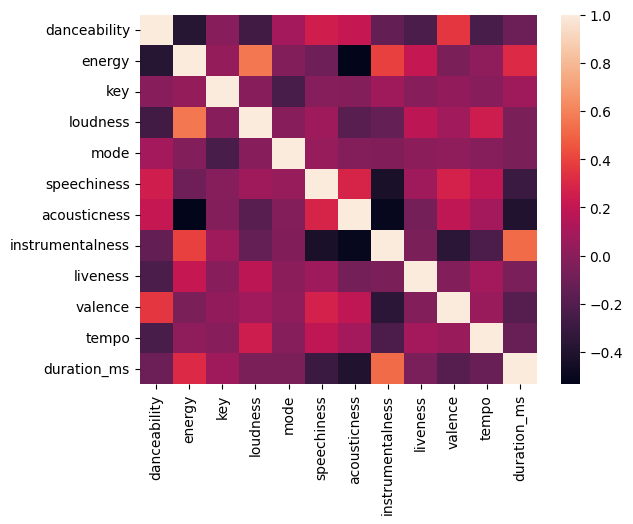

In [13]:
correlations = raw_df.corr('spearman')
sns.heatmap(correlations)


In [14]:
#cluster off numerical fields

scores = defaultdict(list)
km = KMeans(n_clusters=15, random_state=0, n_init="auto")
for seed in range(10):
    km.set_params(random_state=seed)
    km.fit(raw_df)
    scores["Homogeneity"].append(metrics.homogeneity_score(labels, km.labels_))
    scores["Completeness"].append(metrics.completeness_score(labels, km.labels_))
    scores["V-measure"].append(metrics.v_measure_score(labels, km.labels_))
    scores["Adjusted Rand-Index"].append(
        metrics.adjusted_rand_score(labels, km.labels_)
    )
    scores["Silhouette Coefficient"].append(
        metrics.silhouette_score(raw_df, km.labels_, sample_size=2000)
    )
for score_name, score_values in scores.items():
    mean_score, std_score = np.mean(score_values), np.std(score_values)
    print(f"{score_name}: {mean_score:.3f} ± {std_score:.3f}")


Homogeneity: 0.183 ± 0.001
Completeness: 0.191 ± 0.003
V-measure: 0.187 ± 0.001
Adjusted Rand-Index: 0.065 ± 0.000
Silhouette Coefficient: 0.518 ± 0.005


In [15]:
for i in [2,3,4,5,6,7,8,9,10,11,12,13,14]:
    scores = defaultdict(list)
    km = KMeans(n_clusters=i, random_state=0, n_init="auto")
    for seed in range(10):
        km.set_params(random_state=seed)
        km.fit(raw_df)
        scores["Homogeneity"].append(metrics.homogeneity_score(labels, km.labels_))
        scores["Completeness"].append(metrics.completeness_score(labels, km.labels_))
        scores["V-measure"].append(metrics.v_measure_score(labels, km.labels_))
        scores["Adjusted Rand-Index"].append(
            metrics.adjusted_rand_score(labels, km.labels_)
        )
        scores["Silhouette Coefficient"].append(
            metrics.silhouette_score(raw_df, km.labels_, sample_size=2000)
        )
    for score_name, score_values in scores.items():
        mean_score, std_score = np.mean(score_values), np.std(score_values)
        print(f"{score_name}: {mean_score:.3f} ± {std_score:.3f}")

    print()
    print()


Homogeneity: 0.102 ± 0.000
Completeness: 0.474 ± 0.000
V-measure: 0.168 ± 0.000
Adjusted Rand-Index: 0.055 ± 0.000
Silhouette Coefficient: 0.662 ± 0.006


Homogeneity: 0.139 ± 0.000
Completeness: 0.345 ± 0.000
V-measure: 0.198 ± 0.000
Adjusted Rand-Index: 0.089 ± 0.000
Silhouette Coefficient: 0.539 ± 0.006


Homogeneity: 0.153 ± 0.000
Completeness: 0.313 ± 0.000
V-measure: 0.206 ± 0.000
Adjusted Rand-Index: 0.086 ± 0.000
Silhouette Coefficient: 0.544 ± 0.005


Homogeneity: 0.167 ± 0.000
Completeness: 0.291 ± 0.000
V-measure: 0.212 ± 0.000
Adjusted Rand-Index: 0.088 ± 0.000
Silhouette Coefficient: 0.535 ± 0.002


Homogeneity: 0.170 ± 0.000
Completeness: 0.266 ± 0.000
V-measure: 0.207 ± 0.000
Adjusted Rand-Index: 0.084 ± 0.000
Silhouette Coefficient: 0.525 ± 0.007


Homogeneity: 0.174 ± 0.001
Completeness: 0.251 ± 0.001
V-measure: 0.205 ± 0.000
Adjusted Rand-Index: 0.082 ± 0.000
Silhouette Coefficient: 0.521 ± 0.004


Homogeneity: 0.177 ± 0.000
Completeness: 0.239 ± 0.000
V-measure: 0.20

In [16]:
#some scatter plot colored by cluster label



In [17]:
### now we are looking at what to do with PCA

## PCA

In [18]:
n_features = len(raw_df.columns)

pca = []
var_ratio = []
nums = np.arange(n_features) + 1

for n_comp in nums:
    pca_ = PCA(n_components=n_comp).fit(raw_df)
    pca.append(pca_)
    var_ratio.append(np.sum(pca_.explained_variance_ratio_))



In [19]:
print(n_features)

12


Text(0.5, 1.0, 'n_components vs. Explained Variance Ratio')

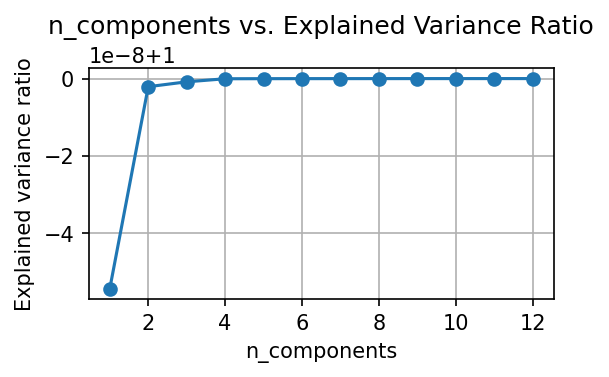

In [20]:
#choose num_components (85% explained ish)
plt.figure(figsize=(4,2),dpi=150)
plt.grid()
plt.plot(nums,var_ratio,marker='o')
plt.xlabel('n_components')
plt.ylabel('Explained variance ratio')
plt.title('n_components vs. Explained Variance Ratio')


<Axes: ylabel='Density'>

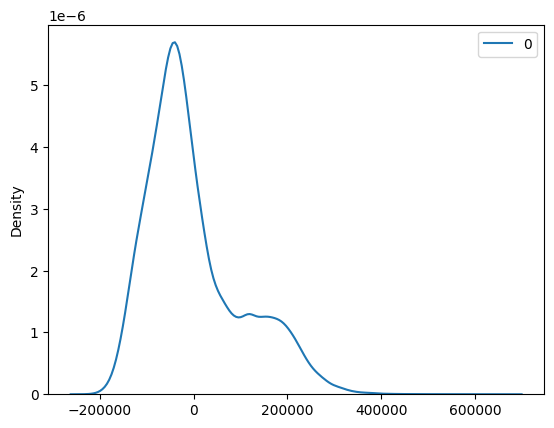

In [21]:
PCA_1 = pca[0].transform(raw_df)
sns.kdeplot(data=PCA_1)

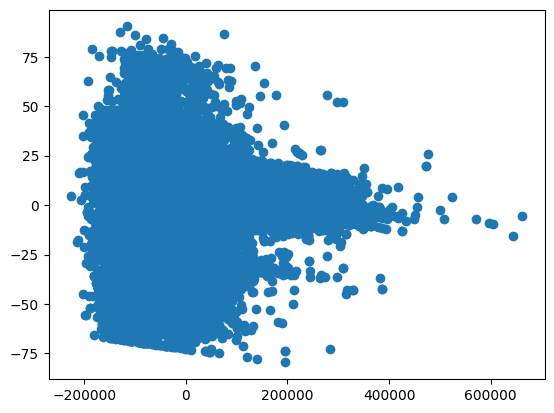

In [22]:
PCA_2 = pca[1].transform(raw_df)
plt.scatter(PCA_2[:,0], PCA_2[:,1])
plt.show()

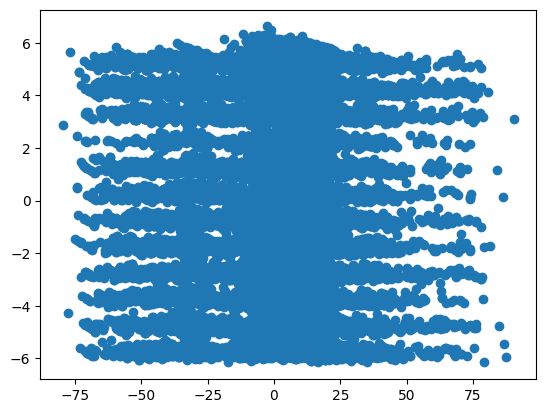

In [23]:
PCA_3 = pca[2].transform(raw_df)
plt.scatter(PCA_3[:,1], PCA_3[:,2])
plt.show()

In [24]:
scores = defaultdict(list)
km = KMeans(n_clusters=15, random_state=0, n_init="auto")
for seed in range(10):
    km.set_params(random_state=seed)
    km.fit(PCA_2)
    scores["Homogeneity"].append(metrics.homogeneity_score(labels, km.labels_))
    scores["Completeness"].append(metrics.completeness_score(labels, km.labels_))
    scores["V-measure"].append(metrics.v_measure_score(labels, km.labels_))
    scores["Adjusted Rand-Index"].append(
        metrics.adjusted_rand_score(labels, km.labels_)
    )
    scores["Silhouette Coefficient"].append(
        metrics.silhouette_score(PCA_2, km.labels_, sample_size=2000)
    )
for score_name, score_values in scores.items():
    mean_score, std_score = np.mean(score_values), np.std(score_values)
    print(f"{score_name}: {mean_score:.3f} ± {std_score:.3f}")


Homogeneity: 0.184 ± 0.001
Completeness: 0.192 ± 0.003
V-measure: 0.188 ± 0.001
Adjusted Rand-Index: 0.065 ± 0.001
Silhouette Coefficient: 0.518 ± 0.004


In [25]:
scores = defaultdict(list)
km = KMeans(n_clusters=15, random_state=0, n_init="auto")
for seed in range(10):
    km.set_params(random_state=seed)
    km.fit(PCA_1)
    scores["Homogeneity"].append(metrics.homogeneity_score(labels, km.labels_))
    scores["Completeness"].append(metrics.completeness_score(labels, km.labels_))
    scores["V-measure"].append(metrics.v_measure_score(labels, km.labels_))
    scores["Adjusted Rand-Index"].append(
        metrics.adjusted_rand_score(labels, km.labels_)
    )
    scores["Silhouette Coefficient"].append(
        metrics.silhouette_score(PCA_1, km.labels_, sample_size=2000)
    )
for score_name, score_values in scores.items():
    mean_score, std_score = np.mean(score_values), np.std(score_values)
    print(f"{score_name}: {mean_score:.3f} ± {std_score:.3f}")


Homogeneity: 0.183 ± 0.001
Completeness: 0.192 ± 0.003
V-measure: 0.188 ± 0.001
Adjusted Rand-Index: 0.065 ± 0.001
Silhouette Coefficient: 0.517 ± 0.006


In [26]:
PCA_1

array([[-126326.84695245],
       [ -26438.84548175],
       [-152044.84915438],
       ...,
       [ -16042.84694846],
       [  72334.15316994],
       [ -88704.84689374]])

In [27]:
reversed_1 = pca[0].inverse_transform(PCA_1)

reversed_2 = pca[1].inverse_transform(PCA_2)

reversed_3 = pca[2].inverse_transform(PCA_3)

reversed_11 = pca[-2].inverse_transform(pca[-2].transform(raw_df))

reversed_12 = pca[-1].inverse_transform(pca[-1].transform(raw_df))



In [28]:
reversed_1[0,:]


array([ 6.48935543e-01,  6.96100132e-01,  5.05871347e+00, -6.11900492e+00,
        5.68541860e-01,  1.84533518e-01,  1.47864986e-01,  8.35438091e-03,
        2.11796987e-01,  4.11778719e-01,  1.52066235e+02,  1.24539000e+05])

In [29]:
raw_df

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,0.831,0.814,2,-7.364,1,0.4200,0.059800,0.013400,0.0556,0.3890,156.985,124539
1,0.719,0.493,8,-7.230,1,0.0794,0.401000,0.000000,0.1180,0.1240,115.080,224427
2,0.850,0.893,5,-4.783,1,0.0623,0.013800,0.000004,0.3720,0.0391,218.050,98821
3,0.476,0.781,0,-4.710,1,0.1030,0.023700,0.000000,0.1140,0.1750,186.948,123661
4,0.798,0.624,2,-7.668,1,0.2930,0.217000,0.000000,0.1660,0.5910,147.988,123298
...,...,...,...,...,...,...,...,...,...,...,...,...
42300,0.528,0.693,4,-5.148,1,0.0304,0.031500,0.000345,0.1210,0.3940,150.013,269208
42301,0.517,0.768,0,-7.922,0,0.0479,0.022500,0.000018,0.2050,0.3830,149.928,210112
42302,0.361,0.821,8,-3.102,1,0.0505,0.026000,0.000242,0.3850,0.1240,154.935,234823
42303,0.477,0.921,6,-4.777,0,0.0392,0.000551,0.029600,0.0575,0.4880,150.042,323200


In [30]:
reversed_2[0,:]


array([ 6.43194403e-01,  6.96992692e-01,  5.05951135e+00, -6.03318321e+00,
        5.66748945e-01,  1.87614839e-01,  1.48449441e-01, -4.76152832e-04,
        2.12918410e-01,  4.13178049e-01,  1.56960877e+02,  1.24539000e+05])

In [31]:
reversed_3[0,:]


array([ 6.44424133e-01,  6.93250630e-01,  1.98950526e+00, -6.03139747e+00,
        6.71595891e-01,  1.88625708e-01,  1.46676295e-01, -8.82065941e-03,
        2.12640713e-01,  4.04981528e-01,  1.56961374e+02,  1.24539000e+05])

In [32]:
reversed_12[0,:]


array([ 8.31000e-01,  8.14000e-01,  2.00000e+00, -7.36400e+00,
        1.00000e+00,  4.20000e-01,  5.98000e-02,  1.34000e-02,
        5.56000e-02,  3.89000e-01,  1.56985e+02,  1.24539e+05])

In [33]:
reversed_11[0,:]


array([ 7.79038381e-01,  7.35017684e-01,  2.00001785e+00, -7.36191897e+00,
        9.99977123e-01,  4.52033463e-01,  2.51477163e-02,  2.70191760e-02,
        5.64276221e-02,  4.08287997e-01,  1.56984920e+02,  1.24539000e+05])

## PCA after scaling

In [34]:
#repeat PCA after scaling data
normalized_df=(raw_df-raw_df.mean())/raw_df.std()
normalized_df.head()


,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,1.223593,0.280076,-0.919287,-0.305511,0.905506,2.246525,-0.212850,-0.727222,-0.902626,0.136788,0.398872,-1.226978
1,0.508474,-1.466168,0.717309,-0.259951,0.905506,-0.453051,1.784497,-0.763361,-0.547224,-0.999574,-1.358548,-0.256793
2,1.344908,0.709837,-0.100989,0.572033,0.905506,-0.588585,-0.482129,-0.763350,0.899446,-1.363639,2.959826,-1.476770
3,-1.043081,0.100555,-1.464819,0.596853,0.905506,-0.265999,-0.424176,-0.763361,-0.570006,-0.780878,1.655465,-1.235506
4,1.012888,-0.753526,-0.919287,-0.408871,0.905506,1.239930,0.707381,-0.763361,-0.273838,1.002997,0.021554,-1.239031


In [35]:
#append results to original df
raw_df = normalized_df

## SVD

In [36]:
n_features = len(raw_df.columns)

svd = []
var_ratio = []
nums = np.arange(n_features) + 1

for n_comp in nums:
    svd_ = TruncatedSVD(n_components=n_comp).fit(raw_df)
    svd.append(svd_)
    var_ratio.append(np.sum(svd_.explained_variance_ratio_))



In [37]:
print(n_features)

12


Text(0.5, 1.0, 'n_components vs. Explained Variance Ratio')

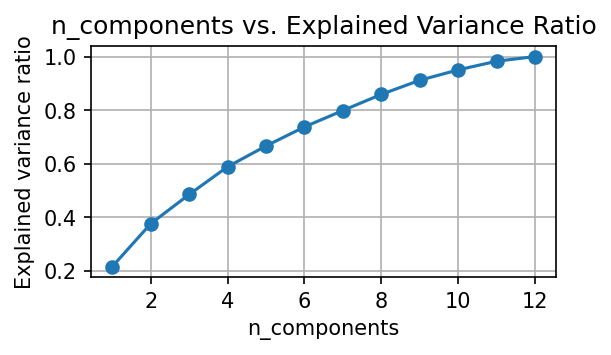

In [38]:
#choose num_components (85% explained ish)
plt.figure(figsize=(4,2),dpi=150)
plt.grid()
plt.plot(nums,var_ratio,marker='o')
plt.xlabel('n_components')
plt.ylabel('Explained variance ratio')
plt.title('n_components vs. Explained Variance Ratio')


<Axes: ylabel='Density'>

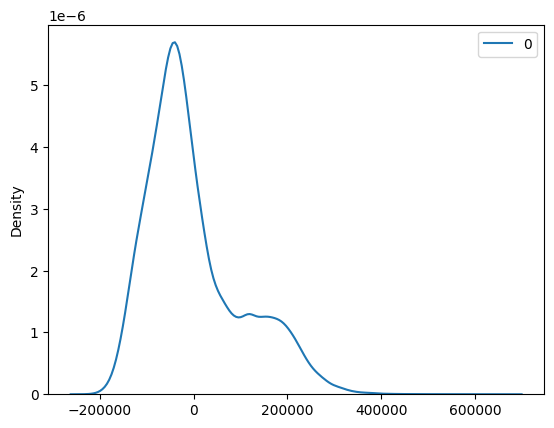

In [39]:
SVD_1 = svd[0].transform(raw_df)
sns.kdeplot(data=PCA_1)

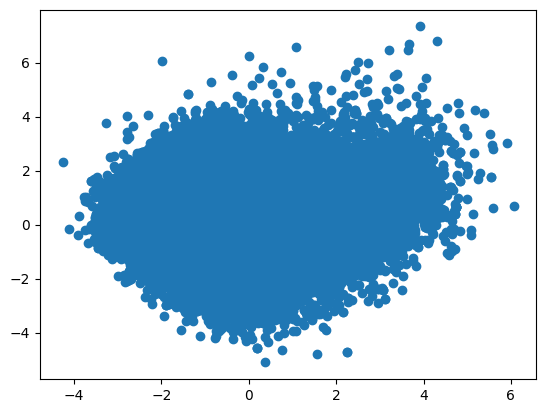

In [40]:
SVD_2 = svd[1].transform(raw_df)
plt.scatter(SVD_2[:,0], SVD_2[:,1])
plt.show()

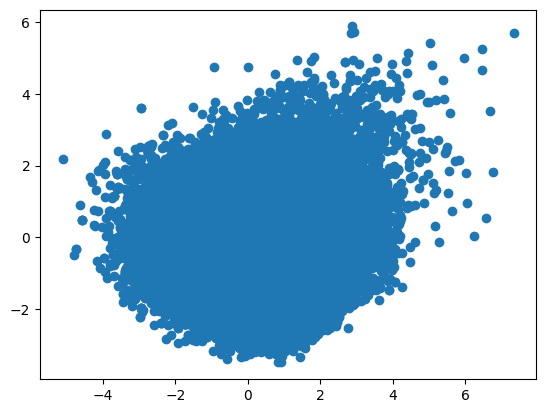

In [41]:
SVD_3 = svd[2].transform(raw_df)
plt.scatter(SVD_3[:,1], SVD_3[:,2])
plt.show()

In [42]:
scores = defaultdict(list)
km = KMeans(n_clusters=15, random_state=0, n_init="auto")
for seed in range(10):
    km.set_params(random_state=seed)
    km.fit(SVD_2)
    scores["Homogeneity"].append(metrics.homogeneity_score(labels, km.labels_))
    scores["Completeness"].append(metrics.completeness_score(labels, km.labels_))
    scores["V-measure"].append(metrics.v_measure_score(labels, km.labels_))
    scores["Adjusted Rand-Index"].append(
        metrics.adjusted_rand_score(labels, km.labels_)
    )
    scores["Silhouette Coefficient"].append(
        metrics.silhouette_score(SVD_2, km.labels_, sample_size=2000)
    )
for score_name, score_values in scores.items():
    mean_score, std_score = np.mean(score_values), np.std(score_values)
    print(f"{score_name}: {mean_score:.3f} ± {std_score:.3f}")


Homogeneity: 0.291 ± 0.001
Completeness: 0.287 ± 0.001
V-measure: 0.289 ± 0.001
Adjusted Rand-Index: 0.134 ± 0.003
Silhouette Coefficient: 0.319 ± 0.005


In [43]:
scores = defaultdict(list)
km = KMeans(n_clusters=15, random_state=0, n_init="auto")
for seed in range(10):
    km.set_params(random_state=seed)
    km.fit(SVD_1)
    scores["Homogeneity"].append(metrics.homogeneity_score(labels, km.labels_))
    scores["Completeness"].append(metrics.completeness_score(labels, km.labels_))
    scores["V-measure"].append(metrics.v_measure_score(labels, km.labels_))
    scores["Adjusted Rand-Index"].append(
        metrics.adjusted_rand_score(labels, km.labels_)
    )
    scores["Silhouette Coefficient"].append(
        metrics.silhouette_score(SVD_1, km.labels_, sample_size=2000)
    )
for score_name, score_values in scores.items():
    mean_score, std_score = np.mean(score_values), np.std(score_values)
    print(f"{score_name}: {mean_score:.3f} ± {std_score:.3f}")


Homogeneity: 0.225 ± 0.000
Completeness: 0.227 ± 0.001
V-measure: 0.226 ± 0.000
Adjusted Rand-Index: 0.084 ± 0.001
Silhouette Coefficient: 0.519 ± 0.007


In [44]:
SVD_1

array([[ 2.02672164],
       [ 1.46757216],
       [ 0.42185472],
       ...,
       [-1.13901288],
       [-1.0271781 ],
       [-0.75541106]])

In [45]:
reversed_1 = svd[0].inverse_transform(SVD_1)

reversed_2 = svd[1].inverse_transform(SVD_2)

reversed_3 = svd[2].inverse_transform(SVD_3)

reversed_11 = svd[-2].inverse_transform(svd[-2].transform(raw_df))

reversed_12 = svd[-1].inverse_transform(svd[-1].transform(raw_df))



In [46]:
reversed_1[0,:]


array([ 0.53554852, -0.9102438 , -0.12609623, -0.35887563,  0.11037256,
        0.66878097,  0.76224355, -0.86577731, -0.26262676,  0.50172192,
        0.22688223, -0.8278549 ])

In [47]:
raw_df

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,1.223593,0.280076,-0.919287,-0.305511,0.905506,2.246525,-0.212850,-0.727222,-0.902626,0.136788,0.398872,-1.226978
1,0.508474,-1.466168,0.717309,-0.259951,0.905506,-0.453051,1.784497,-0.763361,-0.547224,-0.999574,-1.358548,-0.256793
2,1.344908,0.709837,-0.100989,0.572033,0.905506,-0.588585,-0.482129,-0.763350,0.899446,-1.363639,2.959826,-1.476770
3,-1.043081,0.100555,-1.464819,0.596853,0.905506,-0.265999,-0.424176,-0.763361,-0.570006,-0.780878,1.655465,-1.235506
4,1.012888,-0.753526,-0.919287,-0.408871,0.905506,1.239930,0.707381,-0.763361,-0.273838,1.002997,0.021554,-1.239031
...,...,...,...,...,...,...,...,...,...,...,...,...
42300,-0.711061,-0.378166,-0.373755,0.447932,0.905506,-0.841422,-0.378515,-0.762431,-0.530137,0.158229,0.106479,0.178152
42301,-0.781296,0.029835,-1.464819,-0.495232,-1.104328,-0.702718,-0.431200,-0.763312,-0.051711,0.111059,0.102914,-0.395831
42302,-1.777356,0.318156,0.717309,1.143575,0.905506,-0.682111,-0.410712,-0.762709,0.973488,-0.999574,0.312898,-0.155820
42303,-1.036696,0.862157,0.171777,0.574073,-1.104328,-0.771674,-0.559687,-0.683532,-0.891805,0.561316,0.107695,0.702562


In [48]:
reversed_2[0,:]


array([ 0.3569774 , -0.63677017, -0.15479687,  0.07657754,  0.11599599,
        0.85983036,  0.63532043, -1.1305312 , -0.04402968,  0.62302732,
        0.46128105, -1.04494721])

In [49]:
reversed_3[0,:]


array([ 1.09569737, -0.38183085, -0.37647265,  0.24811215,  0.5495274 ,
        1.00945833,  0.23584185, -1.0148964 , -0.14482581,  1.27059124,
        0.07484364, -0.87951521])

In [50]:
reversed_12[0,:]


array([ 1.2235934 ,  0.28007579, -0.91928715, -0.30551086,  0.90550643,
        2.24652504, -0.21285021, -0.72722227, -0.90262634,  0.13678821,
        0.39887164, -1.22697797])

In [51]:
reversed_11[0,:]


array([ 1.06752242, -0.27019378, -0.92087616,  0.09238055,  0.8985951 ,
        2.30443524, -0.31590703, -0.44021975, -0.87096982,  0.26304093,
        0.33948482, -1.19413434])

## Final Analysis

In [52]:
#original df should have:
#original cluster labels
#PCA cluster labels
#PCA+scaled cluster labels

In [53]:
#light EDA of clusters on each
#since cluster labels are not comparable
#examine a cluster which 'stands out'
#find this cluster in all 3 variants
#examine which types of rows of data 'moved' in and out of this interesting cluster